# Tests

In [1]:
%display latex
import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout
            
import warnings
            
@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

## Example 1: Simple

In [2]:
from flowstar.reachability import Reach
from flowstar.poly import Poly
from lbuc import *

In [3]:
R.<x,y> = RIF[]

In [4]:
system = System(
    R,
    (x,y),
    [(1,2), (3,4)],
    [
        -y,
        x,
    ],
)

In [5]:
atomic = Atomic(x)

In [6]:
initials = [RIF(1, 2), RIF(3, 4)]

In [7]:
from lbuc.context_signals import *
from lbuc.reach_trees import gen_sub_space_domains

In [8]:
from lbuc.tests.test_context_signals import sin_cos_solution

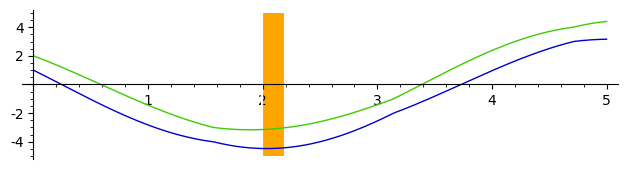

In [9]:
p1 = plot(
    (lambda t: sin_cos_solution(*initials, t)[0].lower(),
     lambda t: sin_cos_solution(*initials, t)[0].upper()),
    (0, 5),
);
p2 = p1 + region_plot(lambda t, _: t in RIF(2,2.2), (0, 5), (-5, 5), incol="orange")
p2.set_aspect_ratio(1/8)
p2

In [10]:
jump_domain = sin_cos_solution(*initials, RIF(2, 2.2)); jump_domain

(-1.?e1, 0.?e1)

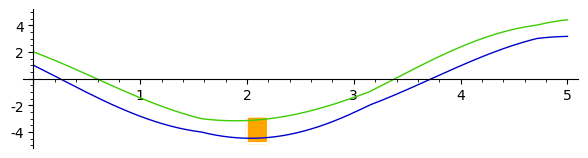

In [11]:
p3 = p1 + region_plot(lambda t, y: t in RIF(2,2.2) and y in jump_domain[0], (0, 5), (-5, 5),
                      incol='orange')
p3.set_aspect_ratio(1/8)
p3

In [12]:
domain_post_jump = list(vector(jump_domain) + vector([RIF(0), RIF(4, 6)]))

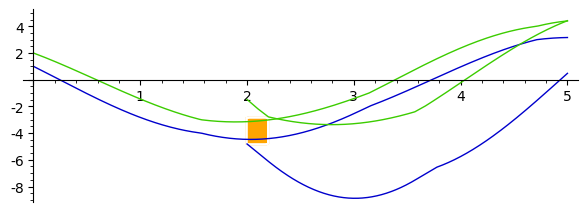

In [13]:
p5 = p3 + plot(
    (lambda t: sin_cos_solution(*domain_post_jump, t - RIF(2,2.2))[0].lower(),
     lambda t: sin_cos_solution(*domain_post_jump, t - RIF(2,2.2))[0].upper()),
    (2, 5),
)
p5

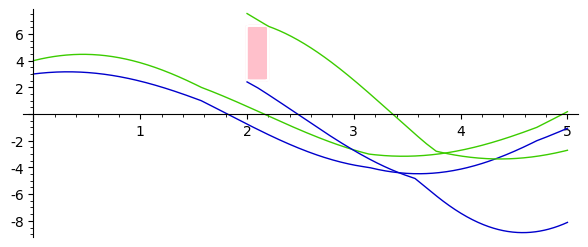

In [14]:
p = plot(
    (lambda t: sin_cos_solution(*initials, t)[1].lower(),
     lambda t: sin_cos_solution(*initials, t)[1].upper()),
    (0, 5),
) + region_plot(
    (lambda t, y: t in RIF(2,2.2) and y in domain_post_jump[1]),
    (0,5),
    (-4,7),
    incol='pink',
) + plot(
    (lambda t: sin_cos_solution(*domain_post_jump, t - RIF(2,2.2))[1].lower(),
     lambda t: sin_cos_solution(*domain_post_jump, t - RIF(2,2.2))[1].upper()),
    (2, 5),
)
p.set_aspect_ratio(1/8)
p

In [9]:
import lbuc.interval_signals as interval_signals

In [10]:
import sage.all as sg

In [11]:
prop = {y: RIF(1, 5)} >> G(RIF(sg.pi/8), Atomic(x + 0.5))

In [12]:
prop2 = {y: RIF(1, 5)} >> Atomic(x + 0.5)

In [13]:
domain = RIF(0, 2*sg.pi)

In [14]:
system

System(R, (x, y), [[1 .. 2], [3 .. 4]], (-y, x), varmap=bidict({'x': x, 'y': y}))

In [15]:
sig = prop2.signal_for_system(
    system,
    domain.upper(),
#    initial_form=InitialForm.COMBINED,
    epsilon_ctx=0.1,
    verbosity=2,
    precompose_contexts=False
)
sig

phi variables sfs = {y, x}
system sfs = System(R, (x, y), [[1 .. 2], [3 .. 4]], (-y, x), varmap=bidict({'x': x, 'y': y}))
calling reach with y0 = ['[1.0000000000000000 .. 2.0000000000000000]', '[3.0000000000000000 .. 4.0000000000000000]']
ode in polynomial ring
C = [1.0..2.0]
C = [3.0..4.0]
assigning system with dimension 2
resulting system has dimension 2
time = 0.100001,	step = 0.100001,	order = 10
time = 0.200001,	step = 0.100001,	order = 10
time = 0.300001,	step = 0.100001,	order = 10
time = 0.400001,	step = 0.100001,	order = 10
time = 0.500001,	step = 0.100001,	order = 10
time = 0.600001,	step = 0.100001,	order = 10
time = 0.700001,	step = 0.100001,	order = 10
time = 0.800001,	step = 0.100001,	order = 10
time = 0.900001,	step = 0.100001,	order = 10
time = 1.000001,	step = 0.100001,	order = 10
time = 1.100001,	step = 0.100001,	order = 10
time = 1.200001,	step = 0.100001,	order = 10
time = 1.300001,	step = 0.100001,	order = 10
time = 1.400001,	step = 0.100001,	order = 10
time = 1.50

BdbQuit: 

In [22]:
ctx_sig = prop2.context_signal_for_system(
    system,#
    domain.upper(),
    initial_form=InitialForm.COMBINED,
    epsilon_ctx=0.1,
    #restriction_method=RestrictionMethod.RECOMPUTE_FLOWPIPE,
    verbosity=2,
)
ctx_sig.signal

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1 .. 2], [3 .. 4]], (-y, x), varmap=bidict({'x': x, 'y': y}))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = <function C.context_signal.<locals>.signal_fn at 0x7fe5e0c47550>, reach_tree = <lbuc.reach_trees.ReachTree object at 0x7fe5f0a6e400>
calling reach with y0 = ['[1.0000000000000000 .. 2.0000000000000000]', '[3.0000000000000000 .. 4.0000000000000000]']
ode in polynomial ring
C = [1.0..2.0]
C = [3.0..4.0]
assigning system with dimension 2
resulting system has dimension 2
time = 0.100001,	step = 0.100001,	order = 10
time = 0.200001,	step = 0.100001,	order = 10
time = 0.300001,	step = 0.100001,	order = 10
time = 0.400001,	step = 0.100001,	order = 10
time = 0.500001,	step = 0.100001,	order = 10
time = 0.600001,	step = 0.100001,	order = 10
time = 0.700001,	step = 0.100001,	order = 10
time = 0.800001,	step = 0.100001,	order = 10
time = 0.900001,	step = 0.100001,	order = 10
time

reached detect roots t=[0.0..0.0] + [0.0..0.1]
Tfinal = [-0.0..0.1]
root on boundary!
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.10000000000000001]]
domain = [0.0000000000000000 .. 0.0060000000000000002]
roots = [[0.0000000000000000 .. 0.10000000000000001]]
seg_domain = [0.0000000000000000 .. 0.0060000000000000002]
roots = [[0.0000000000000000 .. 0.10000000000000001]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x}
system sfs = System(R, (x, y), [[-4.0816514124187942 .. 2.0000000000000005], [0.92448940936546397 .. 4.5304673567368976]], (-y, x), varmap=bidict({'x': x, 'y': y}))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x + 0.50000000000000000?)>, precompose_systems=False, initial_form=<InitialForm.COMBINED: 1>, epsilon_ctx=0.100000000000000, verbosity=2, order=10, step=(0.001, 0.1), instrumentor=<flowstar.in

roots = [[0.0000000000000000 .. 0.10000000000000001]]
domain = [0.0000000000000000 .. 0.0060000000000000002]
roots = [[0.0000000000000000 .. 0.10000000000000001]]
seg_domain = [0.0000000000000000 .. 0.0060000000000000002]
roots = [[0.0000000000000000 .. 0.10000000000000001]]
signal given bool roots: 1 items in 0.00 seconds
Monitoring initial signal: 1 items in 0.02 seconds
(ContextSignal([0.0000000000000000 .. 0.0060000000000000002], [None, [1 .. 5]], [[-1 .. 1]], children=<lbuc.context_signals.ChildIterator object at 0x7fe5e0c40220>)).to_domain(0.01?)
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.0040000000000000001], [], mask=None), reach_tree = None
(ContextSignal([0.0000000000000000 .. 0.0040000000000000001], [None, [1 .. 5]], [[-1 .. 1]], children=<lbuc.context_signals.ChildIterator object at 0x7fe5e0c4e2b0>)).to_domain(0.01?)
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.0020000000000000001], [], mask=Non

root on boundary!
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.10000000000000001]]
domain = [0.0000000000000000 .. 0.0060000000000000002]
roots = [[0.0000000000000000 .. 0.10000000000000001]]
seg_domain = [0.0000000000000000 .. 0.0060000000000000002]
roots = [[0.0000000000000000 .. 0.10000000000000001]]
signal given bool roots: 1 items in 0.00 seconds
Monitoring initial signal: 1 items in 0.01 seconds
(ContextSignal([0.0000000000000000 .. 0.0060000000000000002], [None, [1 .. 5]], [[-1 .. 1]], children=<lbuc.context_signals.ChildIterator object at 0x7fe5e0c3dbe0>)).to_domain(0.01?)
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.0040000000000000001], [], mask=None), reach_tree = None
(ContextSignal([0.0000000000000000 .. 0.0040000000000000001], [None, [1 .. 5]], [[-1 .. 1]], children=<lbuc.context_signals.ChildIterator object at 0x7fe5e0c40cd0>)).to_domain(0.01?)
 ==> creating ContextSignal with coord=(), signal 

(Pdb) args
self = C({y: [1 .. 5]}, LogicWithSystem(Atomic(x + 0.50000000000000000?), repr(System(R, (x, y), [[1 .. 2], [3 .. 4]], (-y, x), varmap=bidict({'x': x, 'y': y})))))
kwargs = {'mask': None, 'restriction_method': <RestrictionMethod.SYMBOLIC: 1>, 'precompose_systems': False, 'initial_form': <InitialForm.COMBINED: 1>, 'epsilon_ctx': 0.100000000000000, 'verbosity': 2, 'order': 10, 'step': (0.001, 0.1), 'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7fe5f0a6b8c0>, 'print_timings': False, 'unpreconditioning_order': 10}
system = System(R, (x, y), [[-0.22924037536239076 .. 1.3909771665927882], [3.1218674748867227 .. 4.4466758512414427]], (-y, x), varmap=bidict({'x': x, 'y': y}))
use_masks = False
refine = 0
(Pdb) sig
Signal([0.0000000000000000 .. 0.0020000000000000001], [], mask=None)
(Pdb) system.y0_ctx
[None, 1.?e1]
(Pdb) [y.str(style='brackets') for y in system.y0_ctx]
*** AttributeError: 'NoneType' object has no attribute 'str'
(Pdb) [None if y is None else 

BdbQuit: 

In [15]:
syst = System(
    R,
    (x, y),
    [RIF(-0.22924037536239076, 1.3909771665927882), RIF(3.1218674748867227, 4.4466758512414427)],
    (-y, x),
    y0_ctx=[None, RIF(1, 5)]
)
syst

System(R, (x, y), [[-0.22924037536239079 .. 1.3909771665927884], [3.1218674748867223 .. 4.4466758512414435]], (-y, x), varmap=bidict({'x': x, 'y': y}))

In [19]:
kwargs = {'mask': None,
          'restriction_method': RestrictionMethod.RECOMPUTE_FLOWPIPE,
          'precompose_systems': False,
          'initial_form': InitialForm.COMBINED,
          #'epsilon_ctx': 0.100000000000000,
          'verbosity': 2,
          'order': 10,
          'step': (0.001, 0.1),
          'print_timings': False,
          'unpreconditioning_order': 10}

In [20]:
Atomic(x + 0.5).signal_for_system(syst, 1, **kwargs)

phi variables sfs = {x}
system sfs = System(R, (x, y), [[-0.22924037536239079 .. 1.3909771665927884], [3.1218674748867223 .. 4.4466758512414435]], (-y, x), varmap=bidict({'x': x, 'y': y}))
calling reach with y0 = [('None', '[-0.22924037536239079 .. 1.3909771665927884]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[3.1218674748867223 .. 4.4466758512414435]')]
ode in polynomial ring
S = [-0.22924037536239078..1.3909771665927884]
C = [1.0..5.0]
S = [3.1218674748867223..4.4466758512414435]
assigning system with dimension 2
resulting system has dimension 2
time = 0.100001,	step = 0.100001,	order = 10
time = 0.200001,	step = 0.100001,	order = 10
time = 0.300001,	step = 0.100001,	order = 10
time = 0.400001,	step = 0.100001,	order = 10
time = 0.500001,	step = 0.100001,	order = 10
time = 0.600001,	step = 0.100001,	order = 10
time = 0.700001,	step = 0.100001,	order = 10
time = 0.800001,	step = 0.100001,	order = 10
time = 0.900001,	step = 0.100001,	order = 10
time = 1.000001,	step = 0.100001

Signal([0.0000000000000000 .. 1.0000000000000000], [([0.44915134433113573 .. 1.0000000000000000], False)], mask=None)

In [21]:
Atomic(x + 0.5).context_signal_for_system(syst, 1, **kwargs).signal

phi variables sfs = {x}
system sfs = System(R, (x, y), [[-0.22924037536239079 .. 1.3909771665927884], [3.1218674748867223 .. 4.4466758512414435]], (-y, x), varmap=bidict({'x': x, 'y': y}))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x + 0.50000000000000000?)>, precompose_systems=False, initial_form=<InitialForm.COMBINED: 1>, verbosity=2, order=10, step=(0.00100000000000000, 0.100000000000000), print_timings=False, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7fa9f8186c00>, unpreconditioning_order=10), reach_tree = <lbuc.reach_trees.ReachTree object at 0x7fa9f817b400>
calling reach with y0 = [('None', '[-0.22924037536239079 .. 1.3909771665927884]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[3.1218674748867223 .. 4.4466758512414435]')]
ode in polynomial ring
S = [-0.22924037536239078..1.3909771665927884]
C = [1.0..5.0]
S = [3.1218674748867223..4.4

Signal([0.0000000000000000 .. 1.0000000000000000], [([0.44915134433113573 .. 1.0000000000000000], False)], mask=None)

In [ ]:
(Pdb) [y.str(style='brackets') for y in reach(0)]
['[-0.22924037536239137 .. 1.3909771665927891]',
 '[4.1218674748867201 .. 9.4466758512414480]']
(Pdb) [y.str(style='brackets') for y in reach(1)]
['[-8.2263215524570477 .. -2.5635248954749836]',
 '[1.5939850267411488 .. 6.7146980214418726]']

(Pdb) [y.str(style='brackets') for y in reach(0)]
['[-0.22924037536239137 .. 1.3909771665927891]',
 '[4.1218674748867201 .. 9.4466758512414480]']
(Pdb) [y.str(style='brackets') for y in reach(1)]
['[-8.2263215524570477 .. -2.5635248954749836]',
 '[1.5939850267411488 .. 6.7146980214418726]']


In [ ]:
{'precompose_systems': False,
 'restriction_method': <RestrictionMethod.RECOMPUTE_FLOWPIPE: 2>,
 'initial_form': <InitialForm.COMBINED: 1>,
 'verbosity': 2,
 'order': 10,
 'step': (0.00100000000000000, 0.100000000000000),
 'print_timings': False,
 'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7f752d699200>,
 'unpreconditioning_order': 10}


In [25]:
help(System)

Help on class System in module lbuc.systems:

class System(builtins.object)
 |  System(R, x: tuple, y0: tuple, y: tuple, varmap: Union[dict, NoneType] = None, y0_ctx: Union[tuple, NoneType] = None)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, R, x: tuple, y0: tuple, y: tuple, varmap: Union[dict, NoneType] = None, y0_ctx: Union[tuple, NoneType] = None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  embed(self, expr)
 |      Embed an expression from the global variable manager
 |      within the variables of the system.
 |  
 |  n(self, name: str) -> Any
 |      Lookup the bond-calculus name for a variable with a given name.
 |  
 |  reach(self, duration, **kwargs) -> flowstar.reachability.Reach
 |  
 |  reach_tree(self, duration, **kwargs)
 |      # Pass on initial form to Reach
 |      # initial_form=InitialForm.SPLIT_VARS,
 |  
 |  streamline_plot(self, xarg, yarg, **kwargs)
 |  
 |  v(self, 